# Week 1: Fixed Points and Stability in 1D Systems
### Aim: Work through the first 3 lectures and gain familiarity with OOP concepts.

## Lecture 1: Course introduction and overview

Prerequisites:
- Single-variable calculus (curve-sketching, Taylor expansion)
- Linear algebra (eigenvalues and eigenvectors)
- Multivariable calculus (partial derivatives, Jacobian matrix)

Fourier analysis will be introduced when necessary.

### Overview (p. 1–11)

#### History
1666: **Isaac Newton** "invents" ODEs to describe planetary orbits, i.e. the two-body problem.
> The three-body problem remains unsolved.

late 1800s: **Henri Poincaré** introduces a geometric approach (phase space) and "proves" the three-body problem is not analytically solvable.
> First glimpse of chaos = aperiodic, seemingly unpredictable behaviour in a deterministic system / sensitive dependence on initial conditions.

1920s–1950s: The "great era" of nonlinear oscillators in physics and engineering, e.g. radio, radar, laser.
> Little interest in the theoretical aspects of nonlinear dynamics due to the focus on relativity and quantum mechanics.

1950s: The invention of the computer presents a new way to approach nonlinear dynamics.

1960s: **Edward Lorenz** (MIT) studies atmospheric convection models exhibiting chaotic behaviour. See also: **Stephen Smale** and KAM (Kolmogorov-Arnold-Moser) Theory.
> The Lorenz equations will be studied in detail in [Lecture 17](https://www.youtube.com/watch?v=gscKcPAm-H0&list=PLbN57C5Zdl6j_qJA-pARJnKsmROzPnO9V&index=17).

~1975: **Robert May** discovers chaos in iterated mappings of population growth (logistic map). **Benoit Mandelbrot** begins studying fractals. **Arthur Winfree** studies nonlinear oscillations in biology, e.g. circadian rhythms (more on this is *Sync*). **David Ruelle** and **Floris Takens** propose a link between chaos and turbulence in the Navier-Stokes equations.

1978: **Mitchell Feigenbaum** discovers the universal route to chaos, explaining it through connections to phase transitions in statistical physics ([renormalisation](https://www.complexityexplorer.org/courses/67-introduction-to-renormalization)).
> Completely different systems can go chaotic in similar ways.

~1980s: Chaos, nonlinear dynamics, and fractals become popular thanks to **James Gleick**'s popular science book *Chaos* which also inspired this SLICC.
> Experimental confirmation of ideas in chaos theory.

1990s: Engineering applications of chaos -> interest starts to drift towards complex systems.

2000s: The main focus of the field is on complex systems and network theory.
> A good introduction to these fields is **Melanie Mitchell**'s book *Complexity: A Guided Tour*.

#### Logical Structure of Dynamics

Differential equations: $\underline{\dot x} = \underline{f}(\underline{x})$ where $ \underline{x} \in \mathbf{R}^n$ with $\underline{x} = (x_1, x_2, ..., x_n)$. Here $\mathbf{R}^n$ is the phase/state space.

In components, we have $n$ coupled differential equations: $\dot x_1 = f_1(x_1, x_2, ..., x_n) ... \dot x_n = f_n(x_1, x_2, ..., x_n)$ where $f_1, ..., f_n$ are given functions.

The above system is linear if all $x_i$ on the RHS are to the first power only, i.e. no powers or functions of $x_i$.
> A system in which $f_i$ are independent of time is called *autonomous*.

Otherwise, the system is *nonlinear*.
\
\
\
**Example**: Simple Harmonic Oscillator (SHO) described by $m \ddot x + kx = 0$

The above can be converted into the form $\underline{\dot x} = \underline{f}(\underline{x})$ as follows:

let $x_1 = x$ and $ x_2 = \dot x$, so $\dot x_1 = x_2$ and $\dot x_2 = -\frac{kx_1}{m}$, which is now a linear, 2nd order system.
\
\
\
**Example**: Pendulum described by the equation $\ddot x + \frac{g}{L}\sin{x} = 0$

Attempting the same linearisation yields:

$\dot x_1 = x_2$ and $\dot x_2 = -\frac{g}{L}\sin{x_1}$, which is a nonlinear system due to the sine term.

Note: the pendulum equation can be solved analytically using *elliptic functions*.
\
\
\
In this course, the main focus will be on finding the *phase portrait* of a system, i.e. a picture of all the qualitatively different trajectories, without solving the associated differential equations analytically.
\
\
\
See p. 10 of Strogatz for an illustrative Dynamical View of the World.

### Flows on the Line (p. 15–34)

1D-systems: $\dot x = f(x)$ where $x \in \mathbf{R}$.
\
\
\
**Example**: $\dot x = \sin{x}$ where $\dot x = \frac{dx}{dt}$.

This implies $t = \int \csc{x} dx = -\ln{\left|\csc{x} + \cot{x}\right|}$ and, with initial conditions $x = x_0$ at $t = 0$, $t = \ln{\left|\frac{\csc{x_0} + \cot{x_0}}{\csc{x} + \cot{x}}\right|}$ which is an exact but not that illustrative a result.
> A more useful and intuitive approach is to analyse the behaviour of the system graphically by plotting the velocity $\dot x$ against the position $x$.

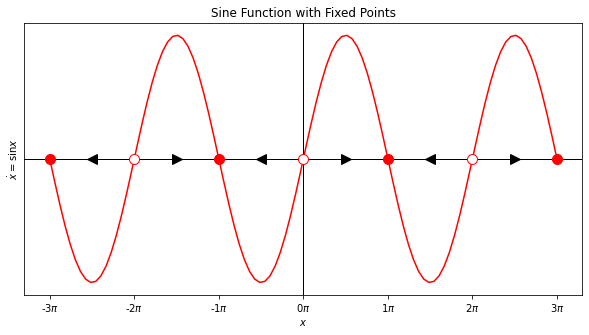

In [179]:
import numpy as np
from matplotlib import pyplot as plt

k = 3

#Define the function we want to analyse, here sine
def func(x):
    return np.sin(x)

#Define first derivative of the function we want to analyse, here cosine
def deriv(x):
    return np.cos(x)

#Define a function to plot the velocity against the position in a given range
def plot_vector_field(n):
    
    #Create a list of values to use for plotting
    x_values = np.linspace(-n*np.pi, n*np.pi, 100)
    
    #Draw the origin axis lines x, y = 0
    plt.axhline(y=0, color='k', linewidth=1)
    plt.axvline(x=0, color='k', linewidth=1)
    
    #Plot the function defined above
    plt.plot(x_values, func(x_values), 'r')


#Define a function to plot the fixed points of the system
def plot_fixed_points(l):
    for p in range(-l, l + 1):
        #Condition for unstable fixed points
        if deriv(p*np.pi) > 0:
            plt.plot(p*np.pi, 0, 'o', ms = 10, color = 'w', mec = 'r')
        #Condition for stable fixed points
        elif deriv(p*np.pi) < 0:
            plt.plot(p*np.pi, 0, 'o', ms = 10, color = 'r')
        else:
            return

def plot_flow(s):
    for p in range(-s, s):
        if func((p + 0.5)*np.pi) > 0:
            plt.plot((p + 0.5)*np.pi, 0, '>', ms = 10, color = 'k')
        elif func((p + 0.5)*np.pi) < 0:
            plt.plot((p + 0.5)*np.pi, 0, '<', ms = 10, color = 'k')

#Format figure and labels
plt.figure(figsize=(10, 5))
plt.title('Sine Function with Fixed Points')
plt.xlabel(r'$x$')
plt.ylabel(r'$\dot x = \sin{x}$')
plt.xticks([m*np.pi for m in range(-k, k + 1)], [str(m) + r'$\pi$' for m in range(-k, k + 1)])
plt.yticks([])

#Define main function that calls the plotting functions
def main(r):
    plot_vector_field(r)
    plot_fixed_points(r)
    plot_flow(r)
    plt.show()
    
#Call function to plot the vector field
main(k)

In the above graph, the points of $\dot x = 0$ (where the line crosses the x-axis) are the fixed points of the system. These are divided into stable (sinks, filled circles) and unstable (sources, open circles) fixed points depending on the behaviour of the system around that fixed point. The black arrows indicate the flow of an imaginary particle in the 1D vector field. This kind of graphical analysis is the basis for much of the study of nonlinear dynamical systems.

**Example**: Logistic Equation in Population Biology

$\dot x = rx\left(1-\frac{x}{k}\right)$ where $x =$ population size, $r>0$ is the growth rate, and $k>0$ is the carrying capacity of the habitat.

$\frac{\dot x}{x} =$ growth rate "per capita"

## Lecture 2: One-Dimensional Systems

### Linearisation / Linear Stability Analysis (p. 24–26)

The fixed points satisty $f(x^*) = 0$. The stability of a fixed point can then be determined by examining the function around $x^*$.

Let $x(t) = x^* + \eta(t)$ where $\eta$ (eta) is a small perturbation from the fixed point.

Then $\dot x = \frac{d}{dt} (x^* + \eta) = \dot \eta$ and $f(x) = f(x^* + \eta)$.

Using a Taylor expansion we get: $f(x^* + \eta) = f(x^*) + \eta f'(x^*) + O(\eta^2)$ where $O(\eta^2)$ denotes the higher-order terms in $\eta$.

As $x^*$ is a fixed point, $f(x^*) = 0$ and $\dot \eta = \eta f'(x^*) + O(\eta^2)$ where the quadratic term is very small and can thus be neglected (assuming $f'(x^*) \neq 0$).

We are then left with the linearisation $\dot \eta \approx \eta f'(x^*)$, so the perturbations grow or diminish exponentially depending on the sign of $f'(x^*)$.

Note: $f'(x^*) = 0$ gives no information about the stability of a fixed point (see: p. 26).
> If the behaviour of the function is parabolic (e.g. $\dot x = x^2$), the fixed point is *half-stable*.

**Example**: The Logistic Equation $\dot x = rx\left(1-\frac{x}{k}\right)$

$\dot x = 0$ when $x^* = 0$ or $x^* = k$ (fixed points)

Differentiating w.r.t. $x$: $\ddot x = r - \frac{2rx}{k}$

At $x^* = 0$, $\ddot x = r - \frac{2r*0}{k} = r > 0$, so the fixed point is unstable.

At $x^* = k$, $\ddot x = r - \frac{2rk}{k} = r - 2r = -r < 0$, so the fixed point is stable.


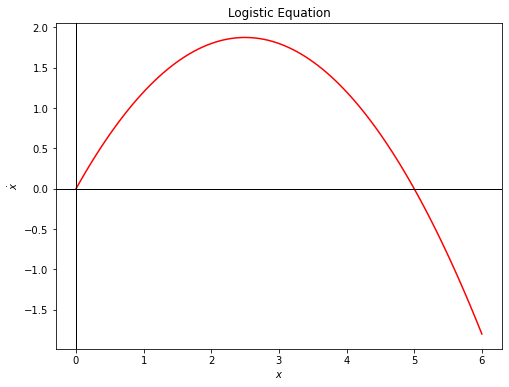

In [32]:
#Define a function to return the growth rate dictated by the logistic equation
def logistic(r, k, x):
    return r*x*(1 - x/k)

#Define function to plot the logistic equation
def plot_logistic(r, k):
    x_values = np.linspace(0, k+1, 100)
    plt.plot(x_values, logistic(r, k, x_values), 'r')
    
    plt.axhline(y=0, color='k', linewidth=1)
    plt.axvline(x=0, color='k', linewidth=1)
    
    plt.show()

#Format figure
plt.figure(figsize=(8, 6))
plt.title('Logistic Equation')
plt.xlabel(r'$x$')
plt.ylabel(r'$\dot x$')
plot_logistic(1.5, 5)

### Existence and Uniqueness Theorem (p. 26–28)

If $f(x)$ and $f'(x)$ are continuous on some interval, there exists a solution to $\dot x = f(x)$, and the solution is unique.
> $f(x)$ is "continuously differentiable".

A rigorous proof of this theorem can be found in "virtually any text on ordinary differential equations".

### Impossibility of Oscillations (p. 28–30)

What is the possible behaviour of $x(t)$ as $t \to \infty$ for $\dot x = f(x)$?

(i) $x(t) \to \pm \infty$ as $t \to \infty$

(ii) $x(t) \to x^*$ (equilibrium)
> Oscillations, incl. damped oscillations, are impossible for 1D systems.

Reason: All trajectories $x(t)$ increase or decrease monotonically or stay fixed. Otherwise the vector field would not be well-defined.
> The SHO is a 2D system and can thus oscillate. Similarly, only > 3D systems can exhibit chaos.

### Bifurcations in 1D Systems (p. 45–80)
#### Models of Instabilities, Transitions, etc.

As a parameter changes, the qualitative structure of the vector field may change dramatically.
> A fixed point may be created or "destroyed" or they may change their stability.

Such a change is called a *bifurcation*.

A bifurcation point or value is the value of the parameter at which the change occurs.
> Bifurcations are critical in the study of e.g. fluid dynamics (onset of turbulence) and cardiac arrhythmia.

### Saddle-Node Bifurcation (p. 46–51)

Basic mechanism for the creation or desctruction of fixed points.

**Example**: $\dot x = r + x^2$ where $r = $ control parameter.



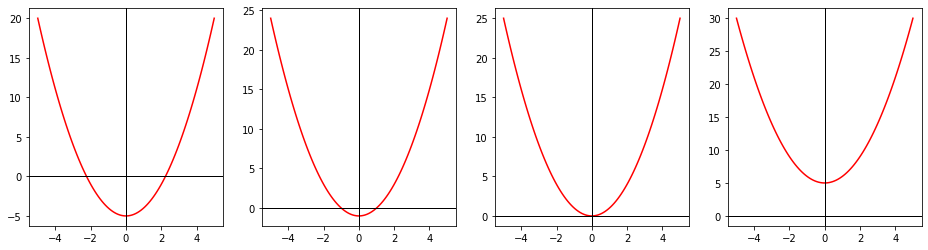

In [30]:
#Define the example function from above
def control(r, x):
    return r + x**2

#Create list of x values for plotting
x_values = np.linspace(-5, 5, 100)    

#Plot the function with four different values of the control parameter
fig, ax = plt.subplots(1, 4, figsize=(16, 4))
ax[0].plot(x_values, control(-5, x_values), 'r')
ax[1].plot(x_values, control(-1, x_values), 'r')
ax[2].plot(x_values, control(0, x_values), 'r')
ax[3].plot(x_values, control(5, x_values), 'r')

#Add axes to the subplots
for n in range(0, 4):
    ax[n].axhline(y=0, color='k', linewidth=1)
    ax[n].axvline(x=0, color='k', linewidth=1)

plt.show()

In the above, there are two fixed points for $r < 0$ (one stable, one unstable), one half-stable fixed point for $r = 0$, and no fixed points for $r > 0$.
> What we see here is a bifurcation. The vector field changes dramatically.

The information conveyed by the graph above can be encoded concisely in a *bifurcation diagram* in which $x^*$ is plotted against $r$.
> See p. 47. Bifurcation diagrams will be explored in more detail in the context of the logistic map.

**Exercise Idea**: 
>Write up a Python program that, for a given function, automatically finds the fixed points and plots the arrows denoting the behaviour of the vector field in a given interval. Note that this type of graphical analysis is fairly straightforward done by hand.

**Example**: $\dot x = r + x - \ln{(1+x)}$

The fixed points satisfy $r + x^* = \ln{(1 + x^*)}$ which cannot be solved analytically.
> The graphical approach makes interpreting this easy.

Plot $y = r + x$ and $y = \ln{(1 + x)}$:

<Figure size 432x288 with 0 Axes>

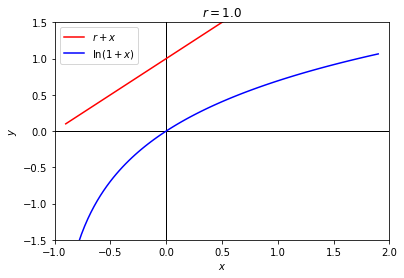

<Figure size 432x288 with 0 Axes>

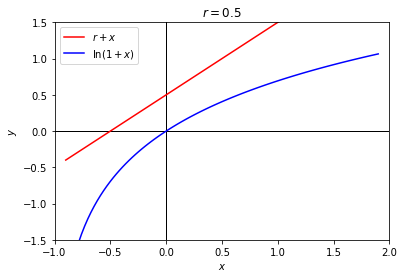

<Figure size 432x288 with 0 Axes>

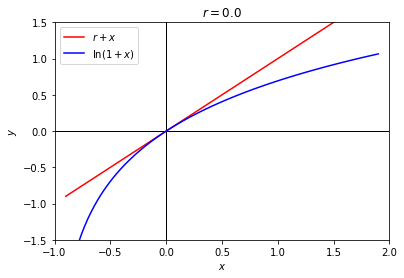

<Figure size 432x288 with 0 Axes>

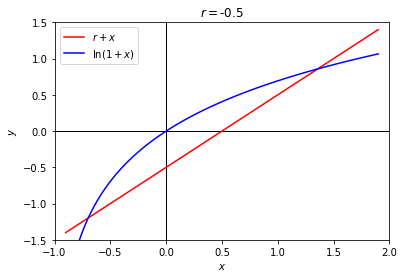

<Figure size 432x288 with 0 Axes>

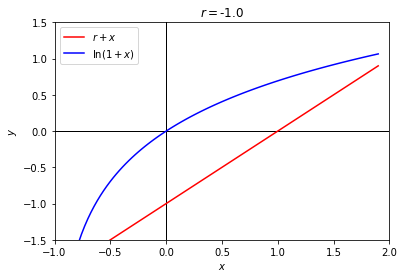

In [31]:
#Define the two functions to plot
def y_1(r, x):
    return r + x

def y_2(x):
    return np.log(1 + x)

#Define main function to perform the plotting
def main(r):
    x_values = np.linspace(-0.9, 1.9, 100)
    plt.plot(x_values, y_1(r, x_values), 'r', label = r'$r + x$')
    plt.plot(x_values, y_2(x_values), 'b', label = r'$\ln{(1 + x)}$')

#Create a for loop to plot a number of instances with different values of r
for k in np.linspace(1, -1, 5):
    plt.clf()
    
    #Format figure with axis labels
    plt.figure(figsize=(6, 4))
    plt.xlabel(r'$x$')
    plt.ylabel(r'$y$')

    #Add origin axes
    plt.axhline(y=0, color='k', linewidth=1)
    plt.axvline(x=0, color='k', linewidth=1)

    #Display legend with functions
    plt.xlim([-1, 2])
    plt.ylim([-1.5, 1.5])
    
    plt.title(r'$r = $' + str(k))
    
    main(k)
    plt.legend()
    plt.show()

In the above, we see the saddle-node bifurcation happening when the tangential intersection occurs in frame 3. The intersecting points of the two lines correspond to the fixed points of the system. The value of the control parameter $r$ at which the bifurcation occurs is called the critical value (here $r_c = 0$).
> Outside of a Jupyter Notebook this image sequence could be animated for further illustration using plt.pause.

Condition: The bifurcation happens when both the value and the derivative of both functions is equal.

$r + x = \ln{(1 + x)}$ and $\frac{d}{dx}(r + x) = \frac{d}{dx}\ln{(1 + x)}$

Hence from the second equation: $1 = \frac{1}{1 + x} \Rightarrow x = 0$ and thus $r = 0$ as evident from the graph.
> The *bifurcation point* is $r_c = 0$ and the *bifurcation* occurs at $x = 0$.

#### Normal Forms (p. 49–51)

The example $\dot x = r \pm x^2$ is called "prototypical", i.e. the dynamics of a given system typically resemble $\dot x = r \pm x^2$ near a saddle-node bifurcation.
> Parabola with two intersecting points $\Leftrightarrow$ Tangential parabola $\Leftrightarrow$ Parabola with no intersecting points

### Transcritical Bifurcation (p. 51–54)

Normal form: $\dot x = rx - x^2 = x(r - x)$ with two fixed points $x^* = 0$ and $x^* = r$.

Note: $x^* = 0$ is a fixed point for all values of $r$ and is indestructible.
>Even though the fixed point cannot be destroyed, its stability may change.

The normal form has the derivative $f'(x) = \frac{d}{dx}(rx - x^2) = r - 2x$.

For $r < 0$, $x^* = 0$ is a stable fixed point and $x^* = r$ an unstable one.

For $r = 0$, the system only has one half-stable fixed point at $x^* = 0$.

For $r > 0$, $x^* = 0$ is an unstable fixed point and $x^* = r$ is a stable one.
> At $r = 0$ the system undergoes a transcritical bifurcation and an *exchange of stabilities* takes place between the two fixed points.

[-3.  0.]
[0. 0.]
[3. 0.]


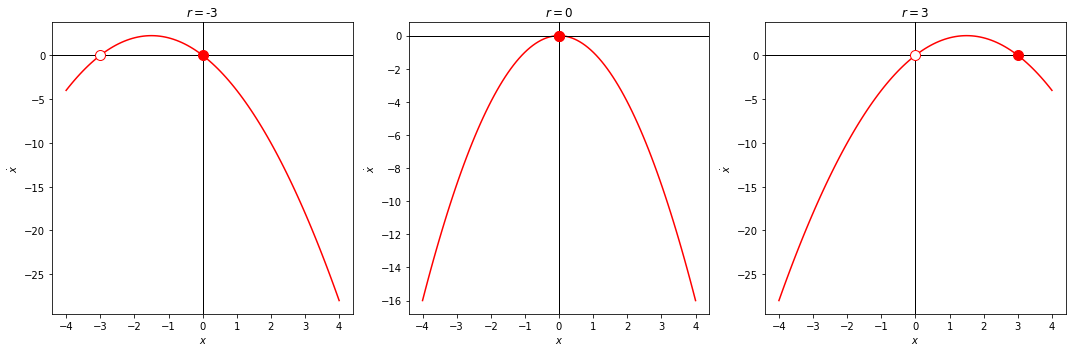

In [97]:
#Define the normal form function
def transcritical(r, x):
    return x * (r - x)

def transcritical_deriv(r, x):
    return r - 2 * x

def is_stable(r, root):
    if transcritical_deriv(r, root) <= 0:
        return True
    else:
        return False

#Create a grid of subplots
fig, ax = plt.subplots(1, 3, figsize=(15, 5))

#Define a list of x values to use for plotting
x_values = np.linspace(-4, 4, 100)

n = 0

#Create a for loop to plot three different instances of the normal form
for k in range(-3, 4, 3):
    #Plot normal form function
    ax[n].plot(x_values, transcritical(k, x_values), 'r')
    
    #Add origin axes
    ax[n].axhline(y=0, color='k', linewidth=1)
    ax[n].axvline(x=0, color='k', linewidth=1)
    
    #Evaluate the roots of the normal form
    roots = np.real(np.roots([-1, k, 0]))
    print(roots)
    
    #Plot roots with their stability
    for m in range(len(roots)):
        if is_stable(k, roots[m]):
            ax[n].plot(roots[m], 0, 'o', ms = 10, color = 'r')
        else:
            ax[n].plot(roots[m], 0, 'o', ms = 10, color = 'w', mec = 'r')
    
    #Format subplot title and labels
    ax[n].set_title(r'$r = $' + str(k))
    ax[n].set_xlabel(r'$x$')
    ax[n].set_ylabel(r'$\dot x$')
    
    fig.tight_layout()
    
    n += 1

plt.show()

Note that the fixed point in the second (middle) subplot is actually half-stable.

**Exercise Idea**:
> Alter the is_stable function such that half-stable fixed points are correctly identified.

### Pitchfork Bifurcation (p. 56–62)

Occurs in systems with *symmetry*.

Normal form: $\dot x = rx - x^3$ which has the symmetry $x \rightarrow -x$

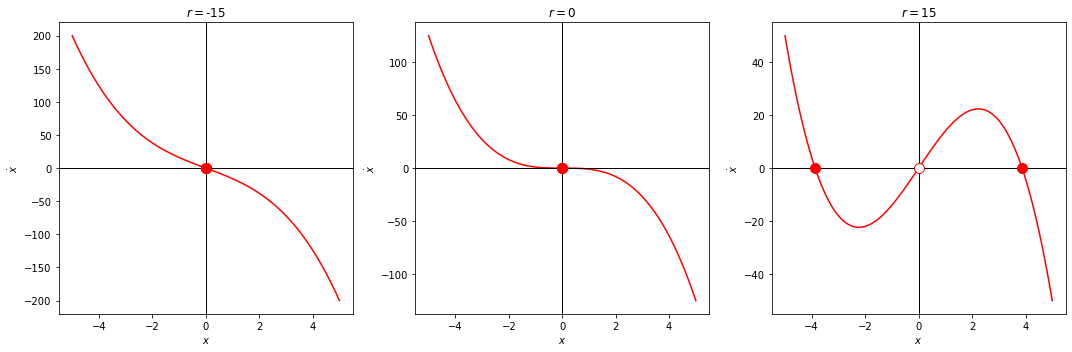

In [193]:
#Define the normal form function
def pitchfork(r, x):
    return r * x - x**3

def pitchfork_deriv(r, x):
    return r - 3*x**2

def is_stable(r, root):
    if pitchfork_deriv(r, root) <= 0:
        return True
    else:
        return False

#Create a grid of subplots
fig, ax = plt.subplots(1, 3, figsize=(15, 5))

#Define a list of x values to use for plotting
x_values = np.linspace(-5, 5, 100)

n = 0

#Create a for loop to plot three different instances of the normal form
for k in range(-15, 16, 15):
    #Plot normal form function
    ax[n].plot(x_values, pitchfork(k, x_values), 'r')
    
    #Add origin axes
    ax[n].axhline(y=0, color='k', linewidth=1)
    ax[n].axvline(x=0, color='k', linewidth=1)
    
    #Evaluate the roots of the normal form
    roots = np.real(np.roots([-1, 0, k, 0]))
    #print(roots)
    
    #Plot roots with their stability
    for m in range(len(roots)):
        if is_stable(k, roots[m]):
            ax[n].plot(roots[m], 0, 'o', ms = 10, color = 'r')
        else:
            ax[n].plot(roots[m], 0, 'o', ms = 10, color = 'w', mec = 'r')
    
    #Format subplot title and labels
    ax[n].set_title(r'$r = $' + str(k))
    ax[n].set_xlabel(r'$x$')
    ax[n].set_ylabel(r'$\dot x$')
    
    fig.tight_layout()
    
    n += 1

plt.show()

In the above, a *supercritical* pitchfork bifurcation occurs at $r = 0$.
> As $r$ becomes positive, the previously stable fixed point $x^* = 0$ becomes unstable and two stable fixed points emerge.

## Lecture 3: Overdamped Bead on a Rotating Hoop

Example of a bifurcation occurring in a mechanical system.

See p. 62–70 of the textbook for detailed, amended notes of the example problem.
> The equation of motion can also be obtained using the *Euler-Lagrange equation* as in the *Dynamics and Vector Calculus* exercise W10.4.

The governing equation: $mr\ddot\phi = -br\dot\phi -mg\sin{\phi} +mr\omega^2\sin{\phi}\cos{\phi}$ which is a *second-order* differential equation.

Note: In the textbook the first RHS term is simply $-b\dot\phi$.

#### Analysis of the First-Order System (p. 63–65)

We begin by making the approximation that $mr\ddot\phi$ is negligible, i.e. $mr\ddot\phi \approx 0$.

Then the governing equation becomes $br\dot\phi = -mg\sin{\phi} +mr\omega^2\sin{\phi}\cos{\phi} = mg\sin{\phi}\left(\frac{r\omega^2}{g}\cos{\phi} - 1\right)$.

According to the equation above, the system has fixed points when $\sin{\phi} = 0$, i.e. $\phi^* = 0$ at the bottom of the hoop and $\phi^* = \pi$ at the top, as well as two additional fixed points when $\frac{r\omega^2}{g} > 1$, i.e. if the hoop is rotating fast enough.

The two emerging fixed points satisfy the condition $\phi^* = \pm\cos^{-1}{\left(\frac{g}{r\omega^2}\right)}$ and we can visualise them through introducing the parameter $\gamma = \frac{r\omega^2}{g}$.
> The fixed points correspond to the intersection points of the constant function $\frac{1}{\gamma}$ and $\cos{\phi}$.

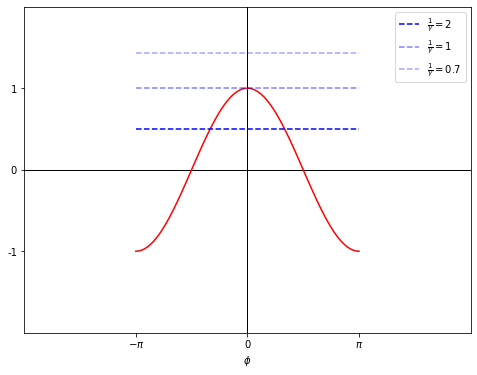

In [157]:
phi_values = np.linspace(-np.pi, np.pi, 100)

#format figure
plt.figure(figsize=(8, 6))

#Add origin axes
plt.axhline(y=0, color='k', linewidth=1)
plt.axvline(x=0, color='k', linewidth=1)

#Plot the cosine function
plt.plot(phi_values, np.cos(phi_values), 'r')

#Plot three instances of the constant function 1/gamma
for g in [2, 1, 0.7]:
    gamma = np.full(shape=100, fill_value=1/g, dtype=np.float)
    plt.plot(phi_values, gamma, 'b', alpha = g/2, linestyle='--', label=r'$\frac{1}{\gamma} = $' + str(g))

plt.xlim([-2*np.pi, 2*np.pi])
plt.ylim([-2, 2])

plt.xlabel(r'$\phi$')
plt.xticks([-np.pi, 0, np.pi], [r'$-\pi$', 0, r'$\pi$'])
plt.yticks([-1, 0, 1], [-1, 0, 1])

plt.legend()

plt.show()

In the above, a bifurcation occurs at $\frac{1}{\gamma} = 1$, creating two fixed points which approach $x^* = \pm \frac{\pi}{2}$ as $\gamma \to \infty$.

Writing the first-order approximation of the governing equation as $\frac{b}{mg}\dot\phi = \sin{\phi}\left(\gamma\cos{\phi} - 1\right)$, we can easily assess the stability of the fixed points.

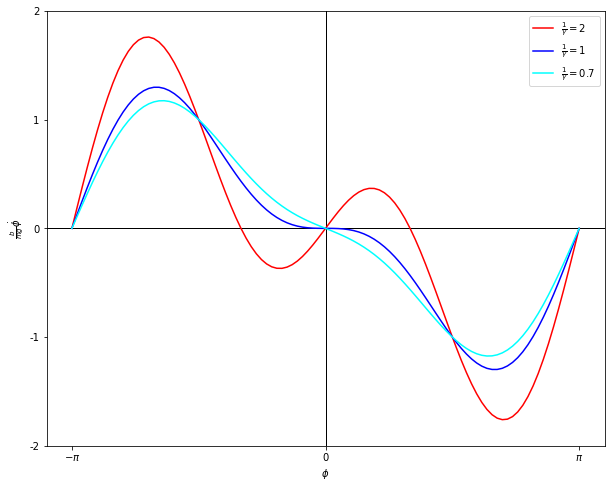

In [192]:
#Define the first-order approximation in terms of gamma and phi
def first_order(gamma, phi):
    return np.sin(phi)*(gamma*np.cos(phi)-1)

plt.subplots(figsize=(10, 8))

#Add origin axes
plt.axhline(y=0, color='k', linewidth=1)
plt.axvline(x=0, color='k', linewidth=1)

#Define colours for the function graphs
colours = ['red', 'blue', 'cyan']
n = 0

#Plot three different instances of the governing equation
for g in [2, 1, 0.7]:
    plt.plot(phi_values, first_order(g, phi_values), color=colours[n], label=r'$\frac{1}{\gamma} = $' + str(g))
    n += 1

#Add title and labels to figure
plt.xlabel(r'$\phi$')
plt.ylabel(r'$\frac{b}{mg}\dot\phi$')
plt.xticks([-np.pi, 0, np.pi], [r'$-\pi$', 0, r'$\pi$'])
plt.yticks(range(-2, 3), range(-2, 3))

plt.legend()
plt.show()

For $\frac{1}{\gamma} \leq 1$, the fixed point $x^* = 0$ (bottom) is stable and $x^* = \pi$ (top) unstable. Following the supercritical pitchfork bifurcation at $\gamma = 1$, the fixed point at the bottom changes stability and the two emerging fixed points are stable (negative slope) at $\gamma > 1$. While the two stable fixed points are symmetrical, a small change in the initial conditions of the system will lead to one being chosen over the other. This is called *symmetry breaking*.

#### Dimensional Analysis (p. 65–67)

Introduce *dimensionless time* $\tau = \frac{t}{T}$ where $T$ is the *characteristic time scale* s.t. $\dot\phi \approx \frac{1}{T}$ and $\ddot\phi \approx\frac{1}{T^2}$. $T$ will be chosen later.

We can then rewrite the derivatives using the chain rule: $\dot\phi = \frac{d\phi}{dt} = \frac{d\phi}{d\tau}\frac{d\tau}{dt} = \frac{1}{T}\frac{d\phi}{d\tau}$ and $\ddot\phi = \frac{d^2\phi}{dt^2} = \frac{1}{T^2}\frac{d^2\phi}{d\tau^2}$

where the terms $\frac{d\phi}{d\tau}$ and $\frac{d^2\phi}{d\tau^2}$ should remain $O(1)$, i.e. of order one, if $T$ is chosen correctly.

Why is nondimensionalising the equation so useful?
>It does away with the ambiguity around the concept of *smallness*. A dimensionless quantity $x$ is small when $x \ll 1$ (unity).

The governing equation the becomes $\frac{mr}{T^2} \frac{d^2\phi}{d\tau^2} = -\frac{br}{T}\frac{d\phi}{d\tau} -mg\sin{\phi} +mr\omega^2\sin{\phi}\cos{\phi}$ which is a balance of forces and can thus be nondimensionalised by dividng by a force $mg$.

This yields: $\left(\frac{r}{gT^2}\right) \frac{d^2\phi}{d\tau^2} = -\left(\frac{br}{mgT}\right)\frac{d\phi}{d\tau} -\sin{\phi} +\left(\frac{r\omega^2}{g}\right)\sin{\phi}\cos{\phi}$ where the terms in parentheses form a dimensionless group.

We focus on the regime in which the LHS is negligible and the RHS terms are of comparable size. The derivatives are of order one by assumption and $\sin{\phi} \approx O(1)$, so, the remaining conditions are: $\frac{br}{mgT} \approx O(1)$ and $\frac{r}{gT^2} \ll 1$.

Setting $\frac{br}{mgT} = 1$, the time scale becomes $T = \frac{br}{mg}$ and the second condition: $\frac{r}{g}\left(\frac{mg}{br}\right)^2 \ll 1 \Rightarrow b^2 \gg \frac{m^2g}{r}$, so the damping has to be very strong for the first-order approximation to be valid.

We can introduce a dimensionless quantity $\epsilon = \frac{m^2g}{b^2r} \ll 1$. As $\epsilon \to 0$, the highest-order derivative of $\phi$ disappears.
> A second-order equation requires *two* initial conditions (position and velocity), whereas the first-order approximation only has *one*. Therefore, the solution to the first-order equation (with $\epsilon \ll 1$) cannot satisfy both initial conditions and is only valid after an initial *transient*.

The transient requires a different time scale, so the scaling $T$ fails during the transient but is valid after that.

Treating the governing equation as $\epsilon\phi'' + \phi' = f(\phi)$ where $\phi'' = \frac{d\phi}{d\tau}$ and $\phi'' = \frac{d^2\phi}{d\tau^2}$, we can define the quantities:

$\Omega = \phi'$ and $\Omega' = \phi'' = \frac{1}{\epsilon}[f(\phi) - \Omega]$ using which the second-order system can be treated as a vector field on a *phase plane* (p. 68–69).

Up next: [Lecture 4](https://www.youtube.com/watch?v=P_YCvTabMO4&list=PLbN57C5Zdl6j_qJA-pARJnKsmROzPnO9V&index=4) – Model of an Insect Outbreak